# Random Forest Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
#alocating the features to X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Validastion Set

In [4]:
#validation set is used to choose best model/parameter to use

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [5]:
print(X_train)

[[    39  73000]
 [    28  89000]
 [    59  42000]
 [    35  53000]
 [    32 100000]
 [    22  55000]
 [    41  52000]
 [    60  46000]
 [    52 114000]
 [    60  34000]
 [    26  86000]
 [    42  54000]
 [    41  71000]
 [    27 137000]
 [    40  57000]
 [    19  70000]
 [    35  72000]
 [    42 108000]
 [    54 104000]
 [    34 112000]
 [    37  80000]
 [    40  57000]
 [    60 108000]
 [    33  28000]
 [    46  82000]
 [    27  31000]
 [    33  43000]
 [    35  97000]
 [    58  23000]
 [    37  70000]
 [    37  72000]
 [    35  23000]
 [    41  72000]
 [    50  88000]
 [    50  36000]
 [    42  75000]
 [    36  60000]
 [    42 149000]
 [    48  33000]
 [    29  43000]
 [    35  61000]
 [    39  61000]
 [    49  39000]
 [    23  82000]
 [    60 102000]
 [    29 148000]
 [    39  71000]
 [    45 131000]
 [    57  74000]
 [    48 138000]
 [    45  45000]
 [    30  80000]
 [    39 122000]
 [    36 125000]
 [    52  21000]
 [    46  59000]
 [    38  71000]
 [    21  68000]
 [    28 12300

In [6]:
print(y_train)

[0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0
 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 1]


In [7]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [8]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 0.13259965  0.19909799]
 [-0.9723974   0.70671325]
 [ 2.14168518 -0.78440659]
 [-0.26921746 -0.43542109]
 [-0.57058029  1.05569874]
 [-1.57512306 -0.37196918]
 [ 0.3335082  -0.46714705]
 [ 2.24213946 -0.65750277]
 [ 1.43850524  1.4998621 ]
 [ 2.24213946 -1.03821422]
 [-1.17330595  0.61153539]
 [ 0.43396248 -0.40369514]
 [ 0.3335082   0.13564608]
 [-1.07285168  2.22955904]
 [ 0.23305392 -0.30851728]
 [-1.87648589  0.10392012]
 [-0.26921746  0.16737203]
 [ 0.43396248  1.30950637]
 [ 1.6394138   1.18260256]
 [-0.36967174  1.43641019]
 [-0.06830891  0.42117966]
 [ 0.23305392 -0.30851728]
 [ 2.24213946  1.30950637]
 [-0.47012602 -1.22856994]
 [ 0.83577958  0.48463157]
 [-1.07285168 -1.13339208]
 [-0.47012602 -0.75268063]
 [-0.26921746  0.96052088]
 [ 2.04123091 -1.38719971]
 [-0.06830891  0.10392012]
 [-0.06830891  0.16737203]
 [-0.26921746 -1.38719971]
 [ 0.3335082   0.16737203]
 [ 1.23759669  0.6749873 ]
 [ 1.23759669 -0.97476231]
 [ 0.43396248  0.26254989]
 [-0.16876319 -0.21333941]
 

In [11]:
print(X_test)

[[-0.77148885  0.64326134]
 [ 0.03214537 -0.53059895]
 [-0.26921746  0.26254989]
 [-0.77148885  0.38945371]
 [-0.26921746 -0.53059895]
 [-1.07285168 -1.48237757]
 [-0.67103457 -1.64100734]
 [-0.16876319  2.45164072]
 [-1.97694017  0.04046822]
 [ 0.93623386 -0.75268063]
 [-0.77148885 -0.56232491]
 [-0.9723974  -0.37196918]
 [-0.06830891 -0.37196918]
 [ 0.13259965  0.3260018 ]
 [-1.77603162  0.61153539]
 [-0.57058029  1.59503996]
 [-0.06830891  0.3260018 ]
 [-1.87648589  0.57980943]
 [ 1.73986808  2.00747736]
 [-0.26921746 -1.41892566]
 [-0.26921746 -0.62577682]
 [ 0.93623386  2.45164072]
 [ 0.3335082  -0.498873  ]
 [ 0.93623386  1.21432851]
 [-1.47466878 -1.22856994]
 [ 1.13714241  2.35646285]
 [-0.9723974   0.64326134]
 [-0.87194312  0.42117966]
 [-0.06830891 -0.14988751]
 [-0.57058029  0.61153539]
 [-1.67557734  0.6749873 ]
 [-0.06830891  0.38945371]
 [ 1.94077663 -0.21333941]
 [-0.06830891 -0.43542109]
 [-1.37421451 -0.27679132]
 [-1.97694017 -0.46714705]
 [-1.57512306  0.45290562]
 

## Training the Random Forest Classification model on the Training set

In [12]:
from sklearn.ensemble import RandomForestClassifier

# n_estimatorsint, default=100----The number of trees in the forest.

# criterion{“gini”, “entropy”}, default=”gini” ---The function to measure the quality of a split.
#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting a new result

In [13]:
print(classifier.predict(sc.transform([[30,87000]]))) #Age--30  Salary--87000

[0]


## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# TP FP
# FN TN

# True Positive (TP) Actual value postive predicted postive.

# False Positive (FP) Actual value negative predicted postive.

# False Negative (FN) actual value positive and predicted negative.

# True Negative (TN) actual value negative and predicted negative.

[[65  3]
 [ 2 30]]


0.95

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


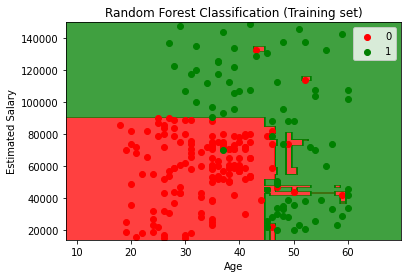

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# RED-----didnt buy suv
# GREEN --buyed suv

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


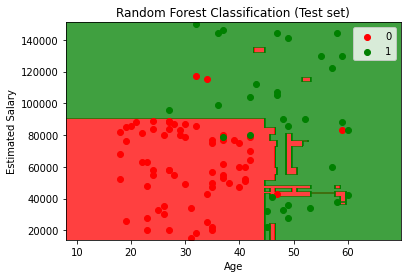

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# RED-----didnt buy suv
# GREEN --buyed suv